In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [2]:
data=pd.read_csv('technical_support_data.csv')

In [3]:
data.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [4]:
data.shape

(23, 8)

In [5]:
data.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [16]:
data_tech=data.iloc[:,1:]
# data_scaled=data_tech.apply(zscore)
data_tech

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,170,1.3,32,0.04,0.00,75,25,1
1,12,2.0,150,0.01,0.50,5,95,3
2,5,1.0,35,0.02,0.20,90,10,1
3,3,2.0,8,0.01,0.70,5,95,3
4,45,2.3,54,0.15,0.00,99,1,1
5,47,3.1,132,0.30,0.03,100,0,0
6,12,4.0,154,0.02,0.05,100,0,0
7,165,1.2,32,0.03,0.00,95,5,1
8,321,1.0,5,0.21,0.00,60,40,4
9,22,3.3,140,0.14,0.01,95,5,0


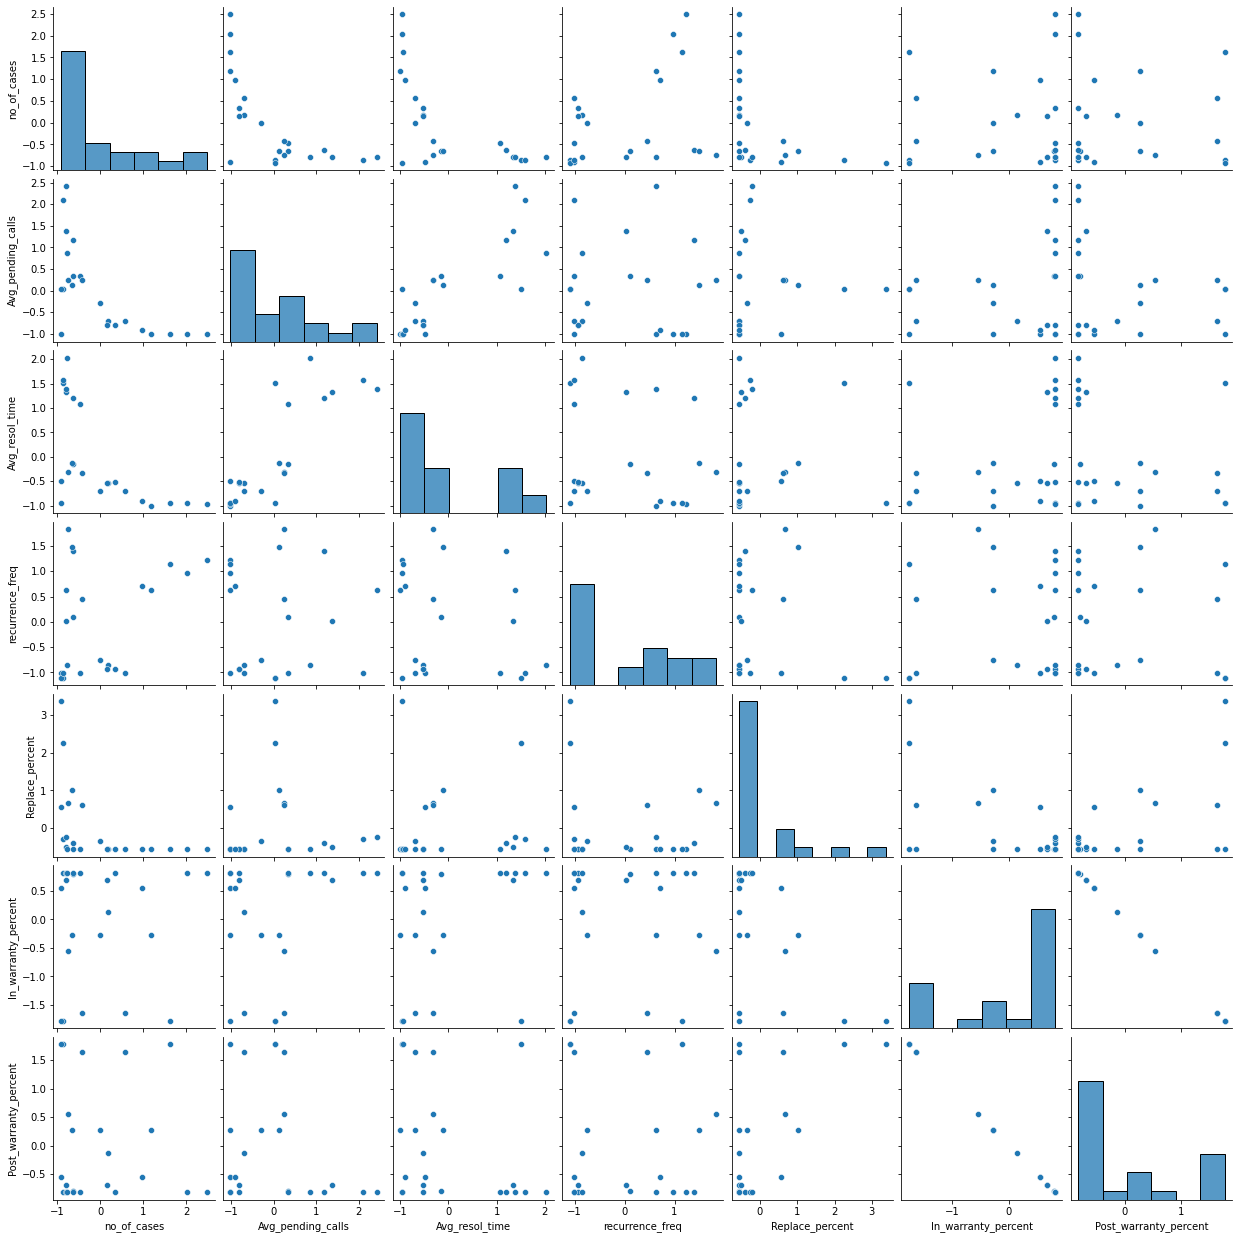

In [7]:
sns.pairplot(data_scaled)

In [8]:
from scipy.spatial.distance import cdist
cluster=range(1,10)

In [9]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandistortions=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_scaled)
    pred=model.predict(data_scaled)
    meandistortions.append(sum(np.min(cdist(data_scaled,model.cluster_centers_,'euclidean'),axis=1))/data_scaled.shape[0])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow method')

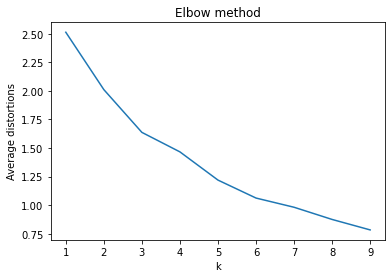

In [10]:
plt.plot(clusters,meandistortions)
plt.xlabel('k')
plt.ylabel('Average distortions')
plt.title('Elbow method')

In [11]:
# k=5
final_model=KMeans(5)
final_model.fit(data_scaled)
pred=final_model.predict(data_scaled)

In [12]:
data['GROUP']=pred
data_scaled['GROUP']=pred
print('Groups assigned')

Groups assigned


In [13]:
data.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,3
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,3
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


In [14]:
data_cluster=data.groupby(['GROUP'])
data_cluster.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,33.333333,3.300,145.666667,0.121667,0.025,99.166667,0.833333
1,119.666667,1.450,34.833333,0.053333,0.040,86.500000,13.500000
2,154.000000,1.760,35.400000,0.228000,0.142,27.000000,73.000000
3,7.500000,2.000,79.000000,0.010000,0.600,5.000000,95.000000
4,395.250000,1.025,7.750000,0.240000,0.000,87.500000,12.500000


In [15]:
# k=